# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import norm

df = pd.read_csv('human_body_temperature.csv')

c:\users\colew\miniconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


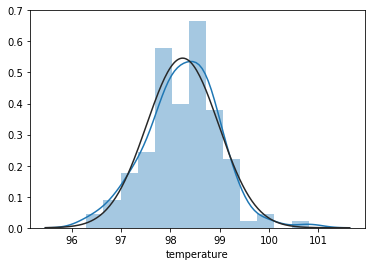

In [6]:
sns.distplot(df['temperature'], fit=norm)


In [7]:
df.groupby('gender').size()


gender
F    65
M    65
dtype: int64

In [8]:
#Sample size is greater than 30, but whether or not it's independent is unclear.

In [10]:
n = 130
sample_mean = np.mean(df.temperature)
sample_std = np.std(df.temperature)
test_mean = 98.6
Z = ((sample_mean - test_mean) / (sample_std / np.sqrt(n)))
print(Z)

-5.4759252020785585


In [11]:
stats.ttest_1samp(df.temperature, test_mean)


Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [12]:
#Based on the pvalue I would venture to guess the temperature is different that 98.6.

In [13]:
print(sample_std)
CI_upper = sample_mean + (sample_std * 2)
CI_lower = sample_mean - (sample_std * 2)
print('Upper Limit Confidence Interval ' + str(CI_upper))
print('Lower Limit Confidence Interval ' + str(CI_lower))

0.730357778905038
Upper Limit Confidence Interval 99.70994632704083
Lower Limit Confidence Interval 96.78851521142067


In [14]:
#We should be concerned about temperatures above 99.7 or below 96.8.

In [15]:
stats.ttest_ind(df_female['temperature'],df_male['temperature'])


NameError: name 'df_female' is not defined

In [ ]:
#Based on the data the the temperature was normally distributed.
#Based on the data the temperature is likely not 98.6.
#Based on the data temperatures above 99.7 or below 96.8 are cause for concern.
#Based on the data there is very likely a difference between male and female body temperatures.